In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# to make this notebook's output stable across runs
np.random.seed(42)
import seaborn as sns

from sklearn import decomposition
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, learning_curve,KFold, cross_val_score, validation_curve, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from numpy import linalg
#from auxCode import *
%matplotlib inline

In [2]:
housing= pd.read_csv("/Users/saineymanga/Desktop/cal-housing.csv")

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
print(housing.shape)

(20640, 10)


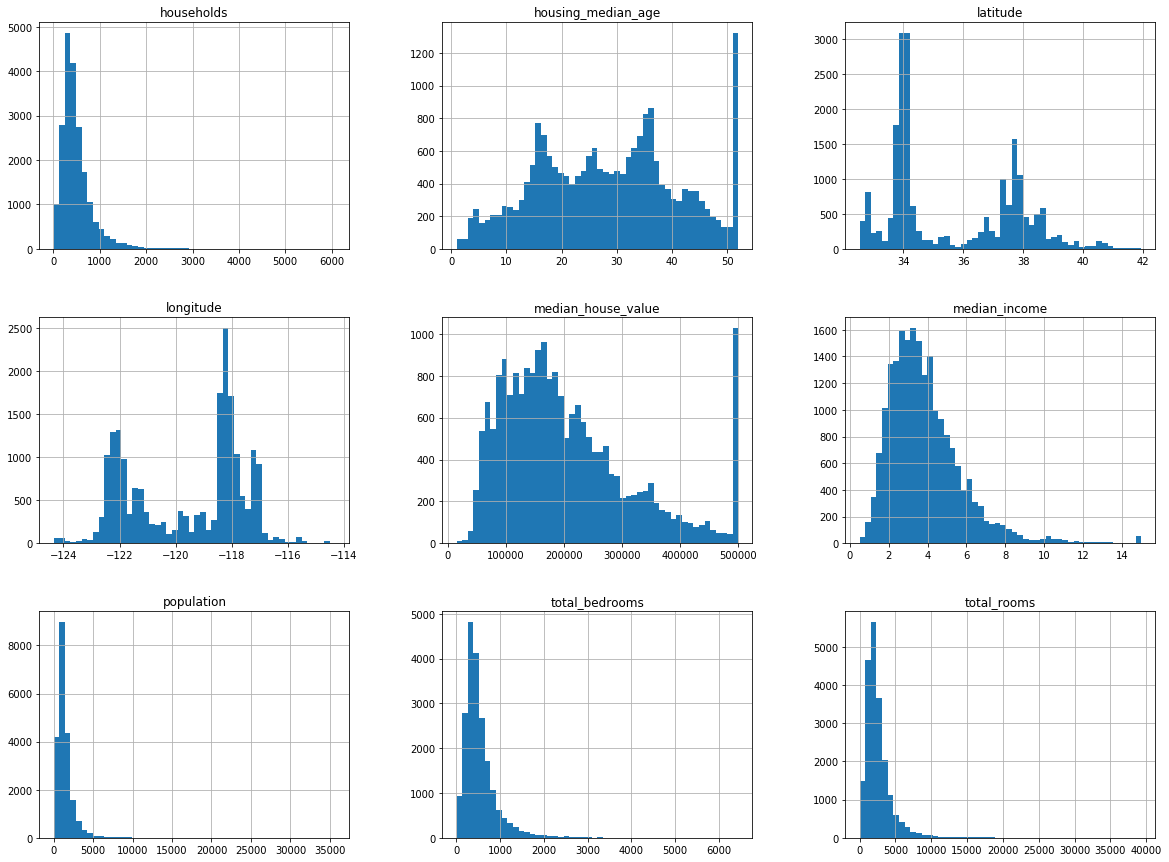

In [9]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

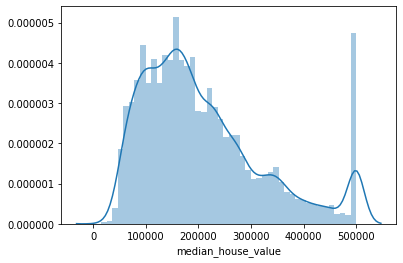

<Figure size 432x288 with 0 Axes>

In [10]:
####distribution of median_house_value
sns.distplot(housing['median_house_value']);
fig = plt.figure()

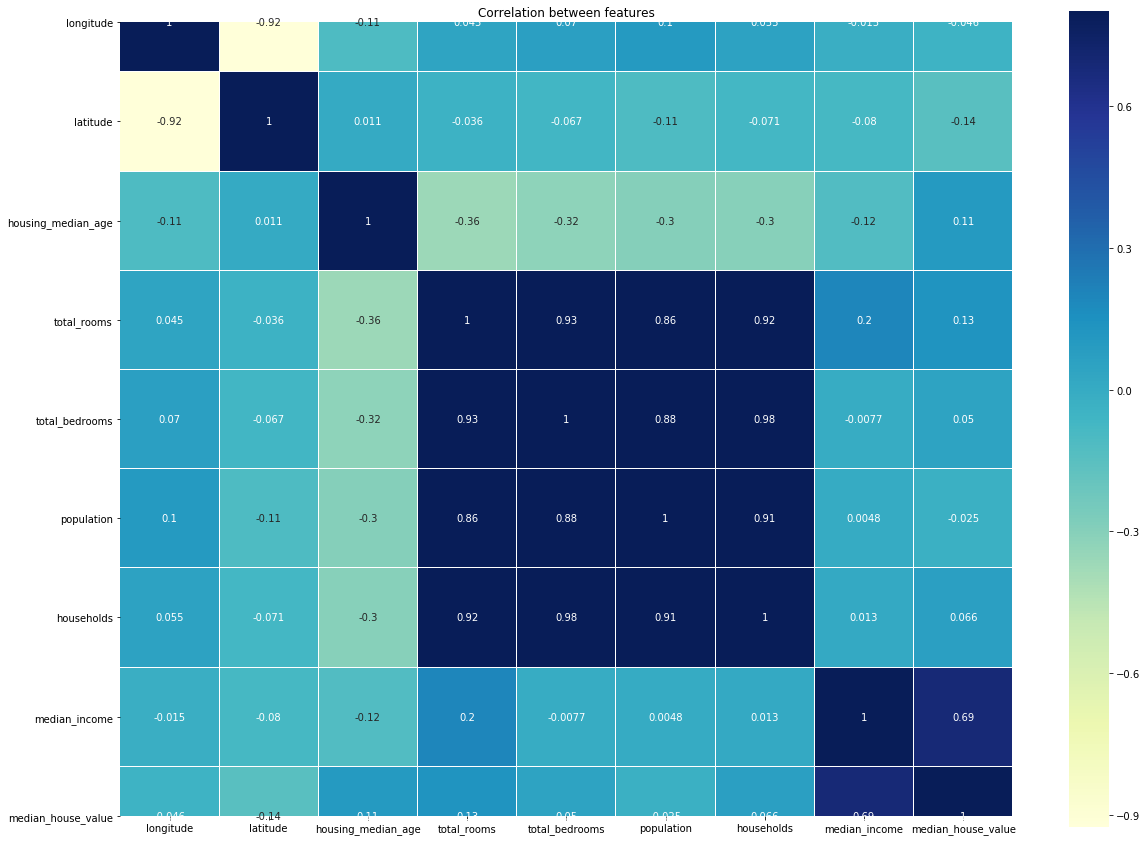

In [11]:
corr=housing.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [12]:
corr[((corr > 0.75) | (corr < -0.80)) & (corr != 1.0)].dropna(axis='index', how='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,NaN,-0.924664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,-0.924664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_rooms,NaN,NaN,NaN,NaN,0.930380,0.857126,0.918484,NaN,NaN
total_bedrooms,NaN,NaN,NaN,0.930380,NaN,0.877747,0.979728,NaN,NaN
population,NaN,NaN,NaN,0.857126,0.877747,NaN,0.907222,NaN,NaN
households,NaN,NaN,NaN,0.918484,0.979728,0.907222,NaN,NaN,NaN


# DATA PREPROCESSING

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [14]:
median = housing['total_bedrooms'].median()######Replacing missing values with the median method
housing['total_bedrooms'].fillna(median, inplace=True)

In [15]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

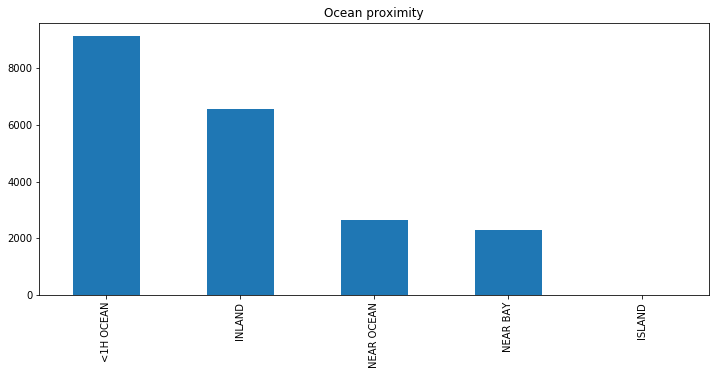

In [16]:
### let's see the counts of each category of "ocean_proximity"
plt.figure(figsize=(12, 5))
plt.title("Ocean proximity")
housing['ocean_proximity'].value_counts().plot(kind="bar")
plt.show()

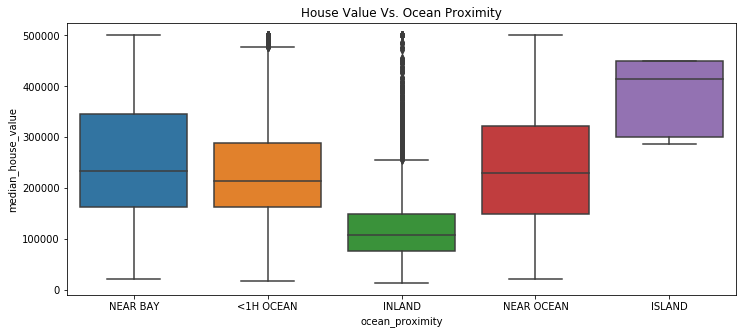

In [17]:
###let's see how important the "Ocean Proximity" categories in determining price
plt.figure(figsize=(12,5))
plt.title('House Value Vs. Ocean Proximity')
sns.boxplot(x='ocean_proximity', y='median_house_value', data=housing)

In [18]:
#le = LabelEncoder()
#housing['ocean_proximity']=le.fit_transform(housing['ocean_proximity'])

In [19]:
##We now encode the ocean_proximity featuture using oneHot encoding
dummies = pd.get_dummies(housing["ocean_proximity"])
housing["<1H OCEAN"] = dummies["<1H OCEAN"] 
housing["INLAND"] = dummies["INLAND"]
housing["ISLAND"] = dummies["ISLAND"]
housing["NEAR BAY"] = dummies["NEAR BAY"]
housing["NEAR OCEAN"] = dummies["NEAR OCEAN"]
housing = housing.drop("ocean_proximity", axis=1)

In [20]:
#####pd.get_dummies(housing['ocean_proximity'])

In [21]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0,0,0,1,0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,0,0,0,1,0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,0,0,0,1,0


# FEATURE SCALING
Before deciding on which scaling method to apply on our data, we have to first check the presence of outliers in our dataset.



In [22]:
num_features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

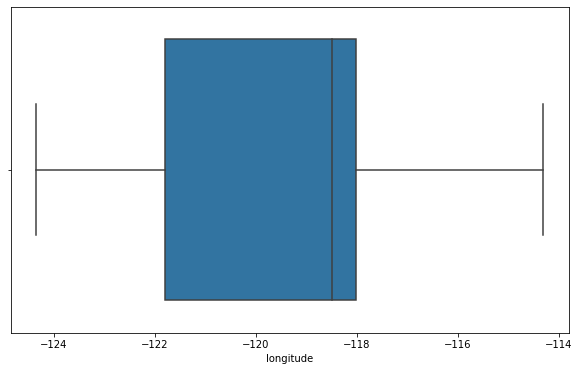

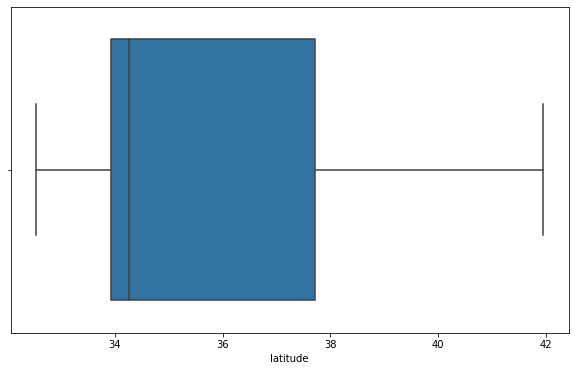

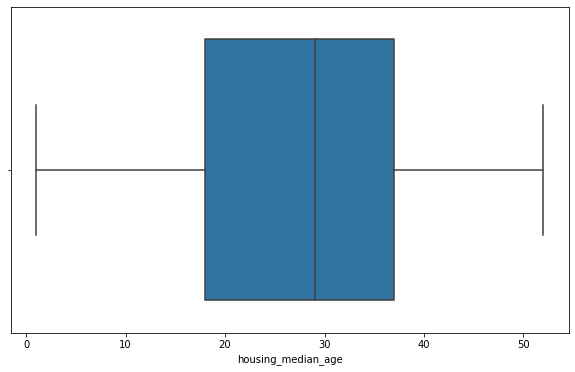

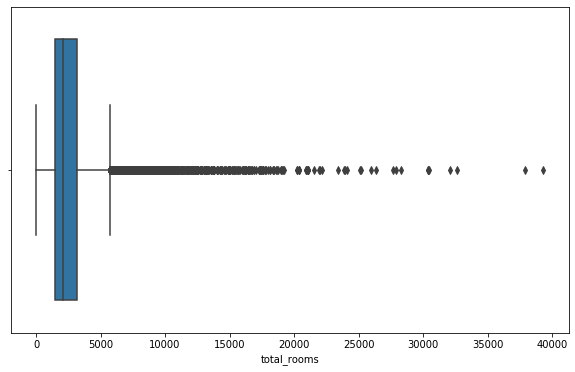

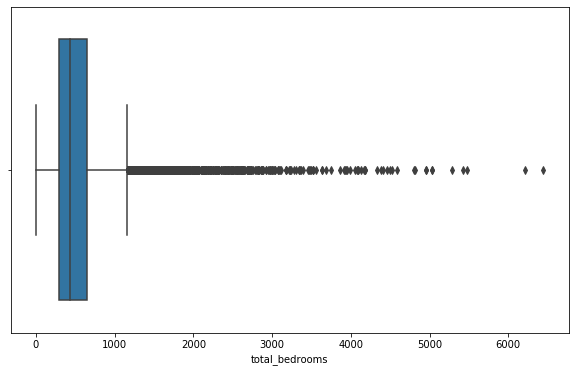

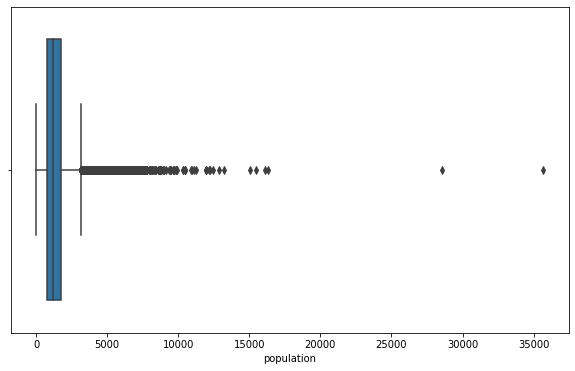

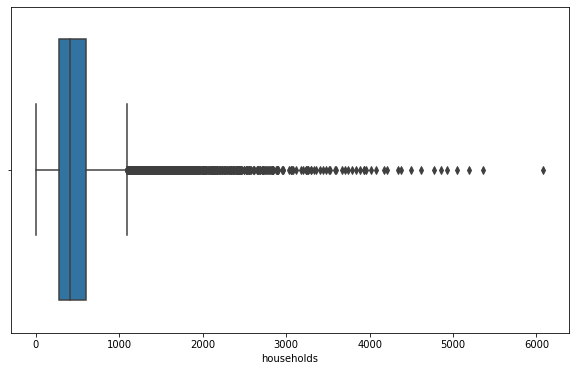

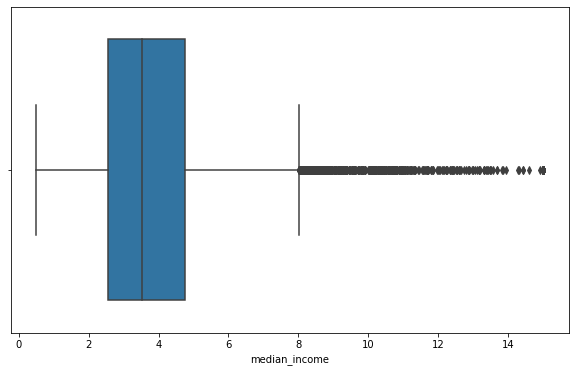

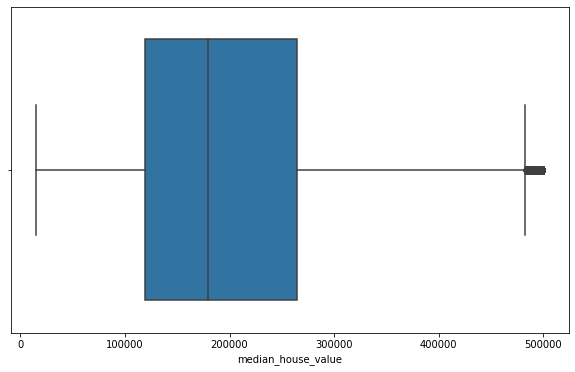

In [23]:
for i in num_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(10,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=housing,ax=ax)

In [24]:
outlier_data = []
for variable in ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']:
    iqr = np.percentile(housing[variable], 75) - np.percentile(housing[variable], 25)
    top_bound = np.percentile(housing[variable], 75) + 1.5 * iqr
    lower_bound = np.percentile(housing[variable], 25) - 1.5 * iqr
    outlier_data.append({'name': variable, 'upper_bound': top_bound, 'lower_bound' : lower_bound})
outlier_data

[{'name': 'total_rooms', 'upper_bound': 5698.375, 'lower_bound': -1102.625},
 {'name': 'total_bedrooms', 'upper_bound': 1162.625, 'lower_bound': -222.375},
 {'name': 'population', 'upper_bound': 3132.0, 'lower_bound': -620.0},
 {'name': 'households', 'upper_bound': 1092.5, 'lower_bound': -207.5},
 {'name': 'median_income',
  'upper_bound': 8.013024999999999,
  'lower_bound': -0.7063750000000004},
 {'name': 'median_house_value',
  'upper_bound': 482412.5,
  'lower_bound': -98087.5}]

In [25]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [26]:
housing[housing[outlier_data[0]['name']] < outlier_data[0]['upper_bound']]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [27]:
for variable in outlier_data:
    housing = housing[housing[variable['name']] <= variable['upper_bound']]
    housing = housing[housing[variable['name']] >= variable['lower_bound']]

In [28]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0,0,0,1,0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,0,0,0,1,0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,0,0,0,1,0
10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,0,0,0,1,0
11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,0,0,0,1,0


In [29]:
print(housing.shape)

(17609, 14)


In [30]:
##### FEATURE SCALING WITH Normalization
norm_housing = housing
norm_housing = (norm_housing - norm_housing.min()) / (norm_housing.max() - norm_housing.min())
norm_housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2,0.213996,0.564293,1.000000,0.257379,0.162209,0.157609,0.160550,0.899633,0.721533,0.0,0.0,0.0,1.0,0.0
3,0.212982,0.564293,1.000000,0.223472,0.201035,0.177430,0.199083,0.684719,0.698417,0.0,0.0,0.0,1.0,0.0
4,0.212982,0.564293,1.000000,0.285488,0.239862,0.179668,0.235780,0.445496,0.700343,0.0,0.0,0.0,1.0,0.0
5,0.212982,0.564293,1.000000,0.161103,0.182053,0.131074,0.175229,0.470871,0.545164,0.0,0.0,0.0,1.0,0.0
6,0.212982,0.563231,1.000000,0.445011,0.420190,0.348785,0.469725,0.420587,0.608306,0.0,0.0,0.0,1.0,0.0
7,0.212982,0.563231,1.000000,0.544975,0.591027,0.368926,0.591743,0.348816,0.484590,0.0,0.0,0.0,1.0,0.0
8,0.211968,0.563231,0.803922,0.448524,0.572045,0.384591,0.544037,0.210414,0.453126,0.0,0.0,0.0,1.0,0.0
9,0.212982,0.563231,1.000000,0.623155,0.608283,0.494885,0.653211,0.424861,0.526756,0.0,0.0,0.0,1.0,0.0
10,0.211968,0.564293,1.000000,0.386507,0.372735,0.289962,0.366972,0.359880,0.570420,0.0,0.0,0.0,1.0,0.0
11,0.211968,0.564293,1.000000,0.615074,0.647110,0.479859,0.671560,0.368853,0.485446,0.0,0.0,0.0,1.0,0.0


# MODEL FITTING

DEFINING FUNCTINS

In [90]:
class Ridge(object):
    def __init__(self):
        pass
    
    def fit(self, S, y, alpha):
        self.w = linalg.inv(S.T.dot(S) + alpha * np.eye(S.shape[1])).dot(S.T.dot(y))
    
    def predict(self, x):
        return x.dot(self.w)

In [91]:
def square_loss(prediction, y):
    return (y - prediction) ** 2

def MSE(prediction, y):
    loss = square_loss(prediction, y)
    return 1/len(loss) * sum(loss)

In [92]:
def split(dataset):
    y = dataset["median_house_value"]
    x = dataset.drop("median_house_value", axis = 1)
    return x, y

def shuffle(dataset):
    return dataset.sample(frac=1, random_state = 42)

In [93]:
ridge_regressor = Ridge()

In [98]:
def tuning(dataset, alphas = np.linspace(0.1, 200, 6000)):
    training_errors = []
    test_errors = []

    X, y = split(dataset)
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 42)
    for alpha in alphas:
        ridge_regressor.fit(x_train, y_train, alpha)
        predictions = ridge_regressor.predict(x_train)
        training_error = MSE(predictions, y_train)
        training_errors.append(training_error)

        predictions = ridge_regressor.predict(x_test)
        test_error = MSE(predictions, y_test)
        test_errors.append(test_error)
    
    return training_errors, test_errors


In [99]:
def plot_errors(train, test, alphas = np.linspace(0.1,200, 6000)):
    plt.figure(figsize=(12, 7))
    plt.xlabel("Alpha")
    plt.ylabel("MSE")
    plt.plot(alphas, train, 'o-', color="r",
                 label="Training error")
    plt.plot(alphas, test, 'o-', color="g",
                 label="Test error")
    plt.legend(loc="best")
    plt.grid()

In [100]:
X, y = split(norm_housing)

In [101]:
train, test = tuning(norm_housing)

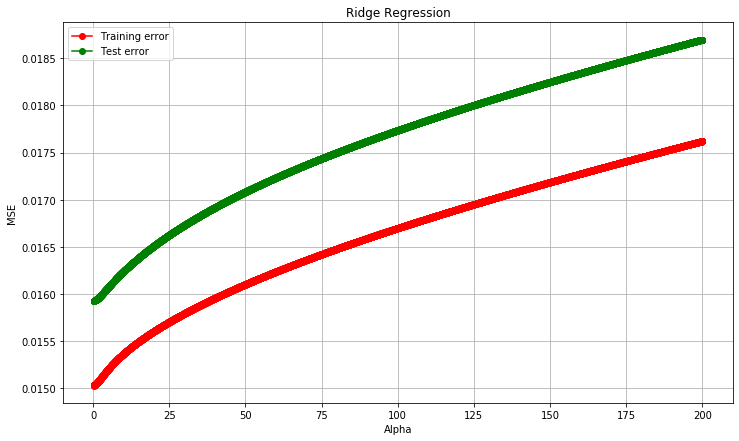

In [74]:
plot_errors(train, test)
plt.title("Ridge Regression")
plt.show()

In [102]:
def cross_validation(dataset, alpha, kf):   
    training_scores = []
    test_scores = []
    
    X, y = split(dataset)
    
    for train_i, test_i in kf.split(dataset):
        
        x_train, x_test = X.iloc[train_i], X.iloc[test_i]
        y_train, y_test = y.iloc[train_i], y.iloc[test_i]

        # learn the train
        ridge_regressor.fit(x_train, y_train, alpha)
        training_result = ridge_regressor.predict(x_train)
        training_scores.append(MSE(training_result, y_train))

        # test the test part
        test_result = ridge_regressor.predict(x_test)
        test_scores.append(MSE(test_result, y_test))

    return training_scores, test_scores

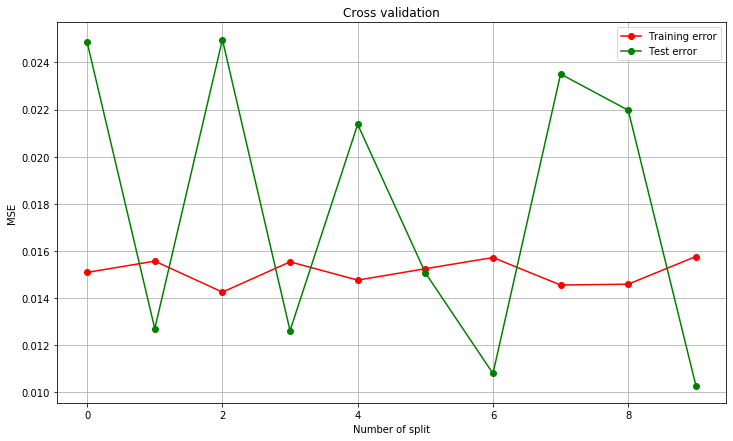

In [103]:
def k_variation(training_scores, test_scores):
    plt.figure(figsize=(12, 7))
    plt.plot(training_scores, 'o-', color="r",
                 label="Training error")
    plt.plot(test_scores, 'o-', color="g",
                 label="Test error")
    plt.xlabel("Number of split")
    plt.ylabel("MSE")
    plt.legend(loc="best")
    plt.grid()

K=10
kf = KFold(n_splits = K)
training_scores, test_scores = cross_validation(norm_housing, 0.1, kf)

train_cv_1 = np.round(np.mean(training_scores), decimals=4)
cv_1 = np.round(np.mean(test_scores), decimals=4)

k_variation(training_scores, test_scores)
plt.title("Cross validation")
plt.show()

In [106]:

def plot_dependence(dataset, kf):
    training_cv_scores = []
    test_cv_scores = []
    alphas = np.linspace(0.1, 200, 6000)
    
    for i in alphas:
        training_error, test_error = cross_validation(dataset, i, kf)
        training_cv_scores.append(np.mean(training_error))
        test_cv_scores.append(np.mean(test_error))

    plt.figure(figsize=(12, 7))
    plt.plot(alphas, training_cv_scores)
    plt.plot(alphas, test_cv_scores)
    plt.legend(["Training error", "Test error"])
    plt.xlabel("Alpha")
    plt.ylabel("Cv risk estimate")
    plt.grid()
    
    return alphas, training_cv_scores, test_cv_scores

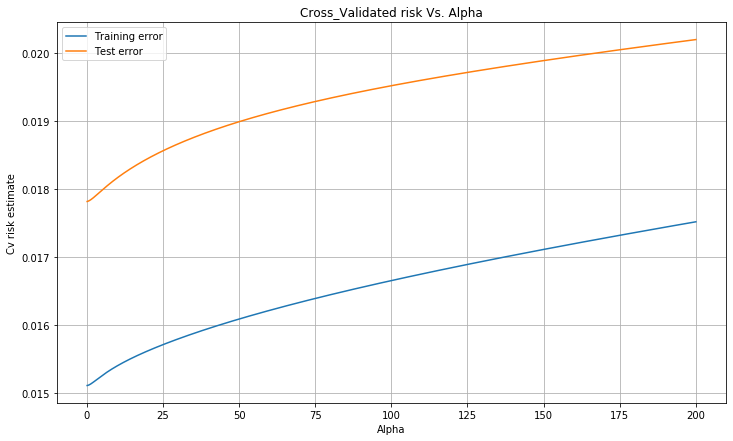

In [107]:
alfas, training_cv_scores, test_cv_scores = plot_dependence(norm_housing, kf)
plt.title('Cross_Validated risk Vs. Alpha')
plt.show()

In [44]:
def PCA_prediction(alphas, x_train, y_train, x_test, y_test):
    pca = decomposition.PCA(n_components=7)
    pca.fit(x_train)
    x_train_pca = pca.transform(x_train)
    x_test_pca = pca.transform(x_test)
    ridge_regressor.fit(x_train_pca, y_train, alfa)
    training_predictions = ridge_regressor.predict(x_train_pca)
    training_error = MSE(training_predictions, y_train)
    test_predictions = ridge_regressor.predict(x_test_pca)
    test_error = MSE(test_predictions, y_test)
    return training_error, test_error

In [112]:
def PCA_cross_validation(dataset, alpha, kf):   
    training_scores = []
    test_scores = []
    
    X, y = split(dataset)
    
    for train_i, test_i in kf.split(dataset):
        
        x_train, x_test = X.iloc[train_i], X.iloc[test_i]
        y_train, y_test = y.iloc[train_i], y.iloc[test_i]
        
        # UPDATE
        training_pca_score, test_pca_score = PCA_prediction(alpha, x_train, y_train, x_test, y_test)    
        
        training_scores.append(training_pca_score)
        test_scores.append(test_pca_score)

    return training_scores, test_scores

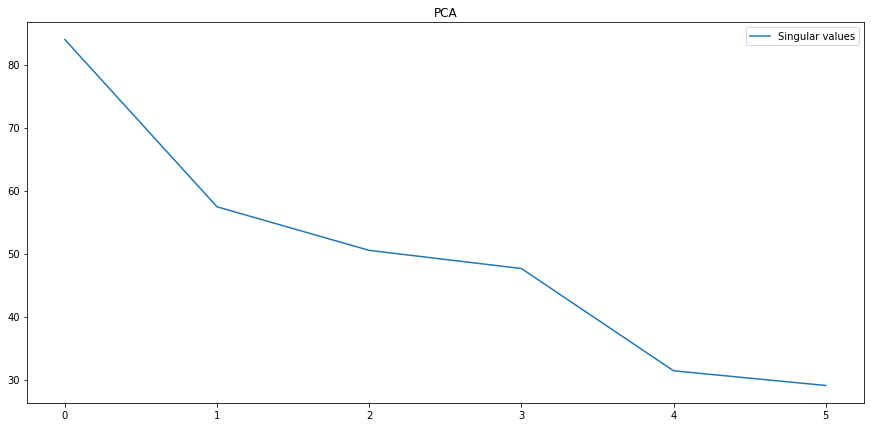

In [122]:
pca = decomposition.PCA(n_components=.95)
pca.fit(X)
plt.figure(figsize=(15,7))
plt.title('PCA')
plt.plot(pca.singular_values_, label='Singular values')
plt.legend()
plt.show()

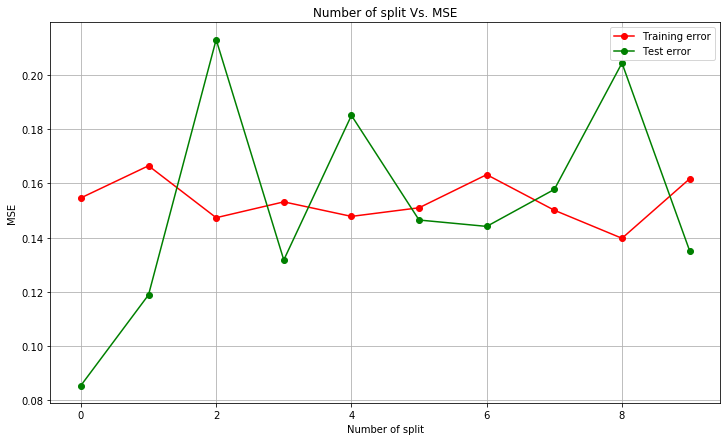

In [123]:
training_scores, test_scores = PCA_cross_validation(norm_housing, 0.1, kf)

cv_1 = np.round(np.mean(test_scores), decimals=4)

k_variation(training_scores, test_scores)
plt.title("Number of split Vs. MSE")
plt.show()

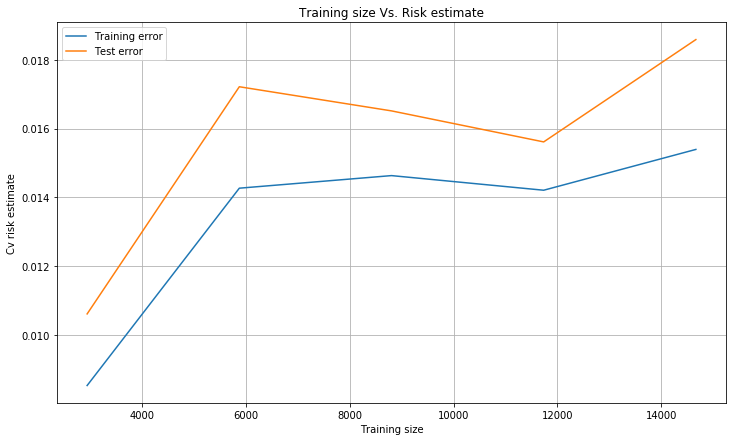

In [124]:
def learning_curve(dataset, alpha, kf, sizes):
    training_error = []
    test_error = []
    
    for i in sizes:
        sub = dataset[0:int(i-1)]
        training_scores, test_scores = cross_validation(sub, alpha, kf)
        training_error.append(np.mean(training_scores))
        test_error.append(np.mean(test_scores))
    
    plt.figure(figsize=(12, 7))
    plt.plot(sizes, training_error)
    plt.plot(sizes, test_error)
    plt.legend(["Training error", "Test error"])
    plt.xlabel("Training size")
    plt.ylabel("Cv risk estimate")
    plt.grid()

sizes = np.array([])
for i in range(1, 6):
    sizes = np.append(sizes, int(len(norm_housing)/6)*i)
    
K = 10
kf = KFold(n_splits = K)
learning_curve(norm_housing, 0.1, kf, sizes)
plt.title("Training size Vs. Risk estimate")
plt.show()